# Analyzing Bronx and Mott Haven monthly average rental prices

In this notebook, we will be looking at trends in monthly rental prices in Bronx and Mott Haven. The objective: find when the biggest spikes in prices happened. This will lead us to further investigation.

In [1]:
# importing libraries

import pandas as pd

In [2]:
# pulling the dataset we need

df = pd.read_csv("datasets/monthly_data_complete.csv")
df.dtypes

filename                       object
period                         object
bx_average_rent                 int64
mott_haven_studio_rent          int64
mott_haven_one-bedroom_rent     int64
mott_haven_two-bedroom_rent     int64
dtype: object

In [3]:
# converting the "period" column values to `datetime`
df["period"] = pd.to_datetime(df["period"], format="%y-%b")

# sorting by "period"
df = df.sort_values("period")
df

,filename,period,bx_average_rent,mott_haven_studio_rent,mott_haven_one-bedroom_rent,mott_haven_two-bedroom_rent
43,monthly-reports/bronx_market_report_may_19.pdf,2019-05-01,1916,1749,1966,2426
32,monthly-reports/bronx_market_report_jun_19.pdf,2019-06-01,1968,2073,2347,2692
26,monthly-reports/bronx_market_report_jul_19.pdf,2019-07-01,1943,1927,2317,2397
5,monthly-reports/bronx_market_report_aug_19.pdf,2019-08-01,1960,2020,2129,2357
60,monthly-reports/bronx_market_report_sep_19.pdf,2019-09-01,1946,1842,2144,2422
...,...,...,...,...,...,...
37,monthly-reports/bronx_market_report_jun_24.pdf,2024-06-01,2504,2559,2897,3437
31,monthly-reports/bronx_market_report_jul_24.pdf,2024-07-01,2547,2466,2873,3381
10,monthly-reports/bronx_market_report_aug_24.pdf,2024-08-01,2565,2674,2935,3451
65,monthly-reports/bronx_market_report_sep_24.pdf,2024-09-01,2583,2688,2903,3460


In [4]:
# getting the percentage change

df["bx_pct_change"] = df["bx_average_rent"].pct_change().mul(100)
df["mott_haven_studio_pct_change"] = df["mott_haven_studio_rent"].pct_change().mul(100)
df["mott_haven_one-bedroom_pct_change"] = df["mott_haven_one-bedroom_rent"].pct_change().mul(100)
df["mott_haven_two-bedroom_pct_change"] = df["mott_haven_two-bedroom_rent"].pct_change().mul(100)

In [5]:
df

,filename,period,bx_average_rent,mott_haven_studio_rent,mott_haven_one-bedroom_rent,mott_haven_two-bedroom_rent,bx_pct_change,mott_haven_studio_pct_change,mott_haven_one-bedroom_pct_change,mott_haven_two-bedroom_pct_change
43,monthly-reports/bronx_market_report_may_19.pdf,2019-05-01,1916,1749,1966,2426,NaN,NaN,NaN,NaN
32,monthly-reports/bronx_market_report_jun_19.pdf,2019-06-01,1968,2073,2347,2692,2.713987,18.524871,19.379451,10.964551
26,monthly-reports/bronx_market_report_jul_19.pdf,2019-07-01,1943,1927,2317,2397,-1.270325,-7.042933,-1.278228,-10.958395
5,monthly-reports/bronx_market_report_aug_19.pdf,2019-08-01,1960,2020,2129,2357,0.874936,4.826155,-8.113940,-1.668753
60,monthly-reports/bronx_market_report_sep_19.pdf,2019-09-01,1946,1842,2144,2422,-0.714286,-8.811881,0.704556,2.757743
...,...,...,...,...,...,...,...,...,...,...
37,monthly-reports/bronx_market_report_jun_24.pdf,2024-06-01,2504,2559,2897,3437,0.320513,-5.711127,-0.412513,1.356532
31,monthly-reports/bronx_market_report_jul_24.pdf,2024-07-01,2547,2466,2873,3381,1.717252,-3.634232,-0.828443,-1.629328
10,monthly-reports/bronx_market_report_aug_24.pdf,2024-08-01,2565,2674,2935,3451,0.706714,8.434712,2.158023,2.070393
65,monthly-reports/bronx_market_report_sep_24.pdf,2024-09-01,2583,2688,2903,3460,0.701754,0.523560,-1.090290,0.260794


## Finding months with the biggest percentage changes

In [6]:
# bronx average rent percentage change
bx_data = df.sort_values("bx_pct_change", ascending=False)[["period", "bx_average_rent", "bx_pct_change"]]
bx_data.head(10)

,period,bx_average_rent,bx_pct_change
9,2023-08-01,2482,3.849372
48,2024-05-01,2496,3.740648
58,2023-10-01,2488,3.537245
23,2022-01-01,2107,3.233709
19,2023-02-01,2336,3.089144
32,2019-06-01,1968,2.713987
44,2020-05-01,1986,2.688728
46,2022-05-01,2236,2.240512
41,2023-03-01,2385,2.097603
22,2021-01-01,2022,1.966717


In [7]:
# mott haven studio rent
mh_studio_data = df.sort_values("mott_haven_studio_pct_change", ascending=False)\
[["period", "mott_haven_studio_rent", "mott_haven_studio_pct_change"]]
mh_studio_data.head(10)

,period,mott_haven_studio_rent,mott_haven_studio_pct_change
13,2021-12-01,2150,21.400339
32,2019-06-01,2073,18.524871
21,2020-01-01,2048,14.862591
29,2022-07-01,2857,12.702170
19,2023-02-01,2773,11.814516
23,2022-01-01,2352,9.395349
48,2024-05-01,2714,9.215292
10,2024-08-01,2674,8.434712
27,2020-07-01,2029,7.184363
12,2020-12-01,1912,6.756002


In [8]:
# mott haven one-bedroom rent
mh_one_bedroom_data = df.sort_values("mott_haven_one-bedroom_pct_change", ascending=False)\
[["period", "mott_haven_one-bedroom_rent", "mott_haven_one-bedroom_pct_change"]]
mh_one_bedroom_data.head(10)

,period,mott_haven_one-bedroom_rent,mott_haven_one-bedroom_pct_change
32,2019-06-01,2347,19.379451
12,2020-12-01,2414,12.593284
3,2023-04-01,3068,11.401598
44,2020-05-01,2062,9.914712
22,2021-01-01,2631,8.989229
63,2022-09-01,2706,8.718361
38,2020-03-01,2197,8.547431
9,2023-08-01,3106,7.177364
54,2019-10-01,2280,6.343284
23,2022-01-01,2468,5.560308


In [9]:
# mott haven two-bedroom rent
mh_two_bedroom_data = df.sort_values("mott_haven_two-bedroom_pct_change", ascending=False)\
[["period", "mott_haven_two-bedroom_rent", "mott_haven_two-bedroom_pct_change"]]
mh_two_bedroom_data.head(10)

,period,mott_haven_two-bedroom_rent,mott_haven_two-bedroom_pct_change
12,2020-12-01,2780,13.887751
11,2019-12-01,2506,12.376682
36,2023-06-01,3477,11.657033
0,2020-04-01,2621,11.626917
32,2019-06-01,2692,10.964551
41,2023-03-01,3543,10.373832
23,2022-01-01,3087,9.235669
52,2022-11-01,3296,7.326604
9,2023-08-01,3740,7.101947
21,2020-01-01,2663,6.264964


# Observation

The earliest spike we're seeing is **June 2019**. It's within the top 10 biggest percentage changes for all four sorted dfs.

### Visualization

With June 2019 as our anchor, let's plot trends... going every six months? then monthly?

## Bronx average rent

<Axes: xlabel='period'>

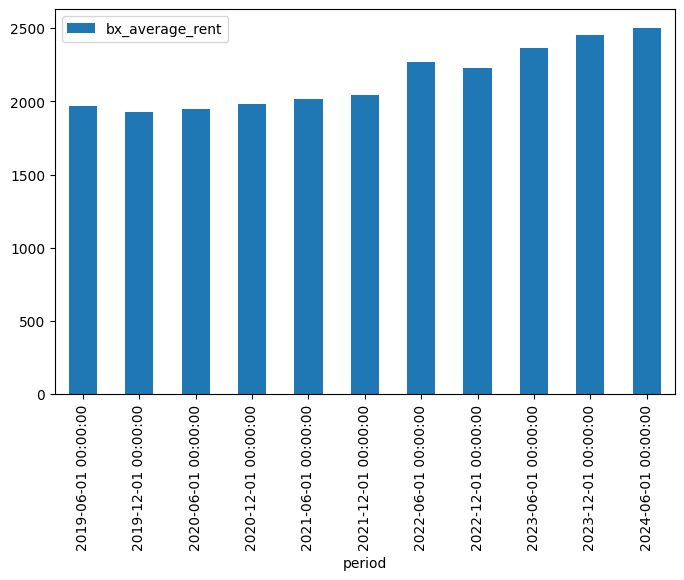

In [10]:
# bronx average rent
filtered = bx_data[bx_data["period"].dt.month.isin([6, 12])]
filtered.sort_values("period").plot(kind="bar", x="period", y="bx_average_rent", figsize=[8,5])

<Axes: xlabel='period'>

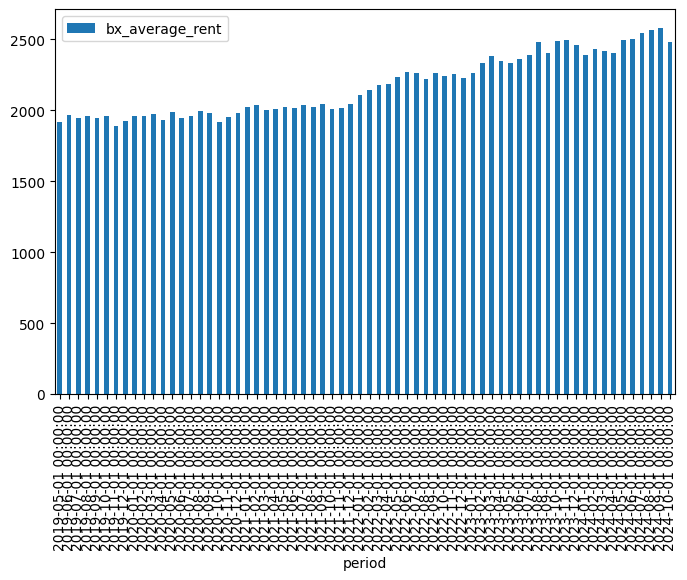

In [11]:
bx_data.sort_values("period").plot(kind="bar", x="period", y="bx_average_rent", figsize=[8,5])

## Mott Haven (studio) rent

<Axes: xlabel='period'>

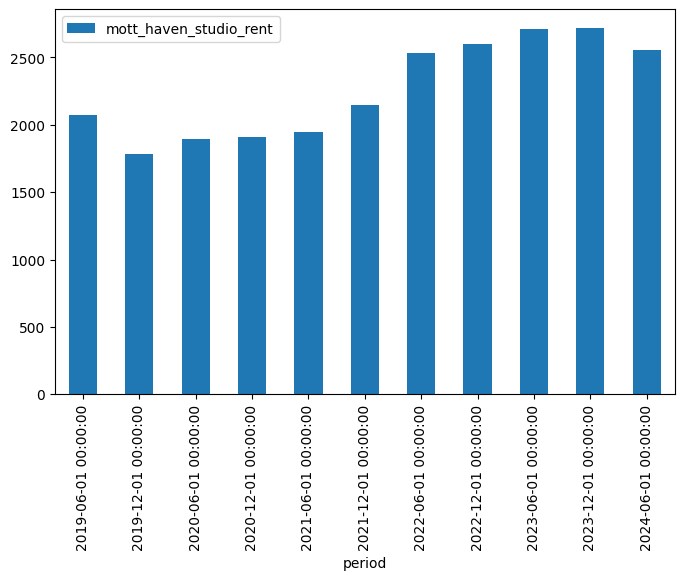

In [12]:
# mott haven studio rent
filtered = mh_studio_data[mh_studio_data["period"].dt.month.isin([6, 12])]
filtered.sort_values("period").plot(kind="bar", x="period", y="mott_haven_studio_rent", figsize=[8,5])

<Axes: xlabel='period'>

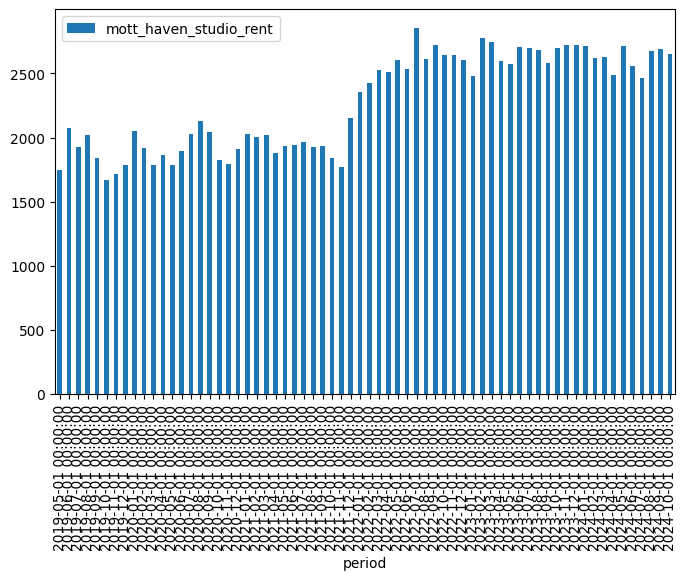

In [13]:
mh_studio_data.sort_values("period").plot(kind="bar", x="period", y="mott_haven_studio_rent", figsize=[8,5])

## Mott Haven (one-bedroom)

<Axes: xlabel='period'>

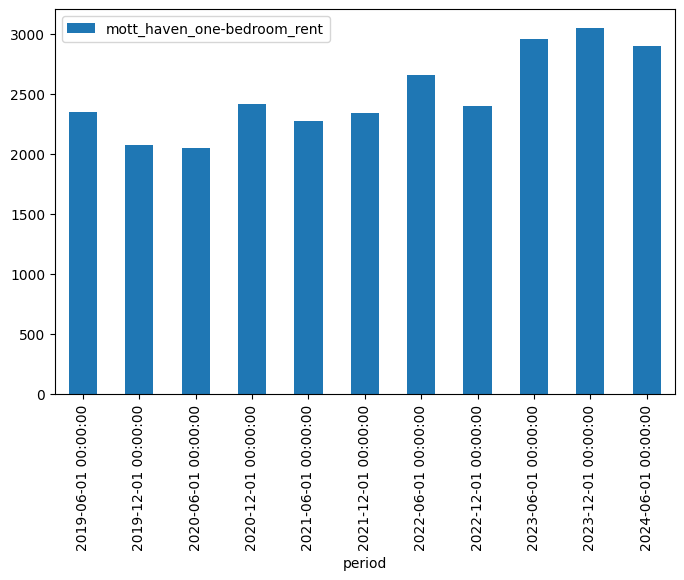

In [14]:
# mott haven one-bedroom rent
filtered = mh_one_bedroom_data[mh_one_bedroom_data["period"].dt.month.isin([6, 12])]
filtered.sort_values("period").plot(kind="bar", x="period", y="mott_haven_one-bedroom_rent", figsize=[8,5])

<Axes: xlabel='period'>

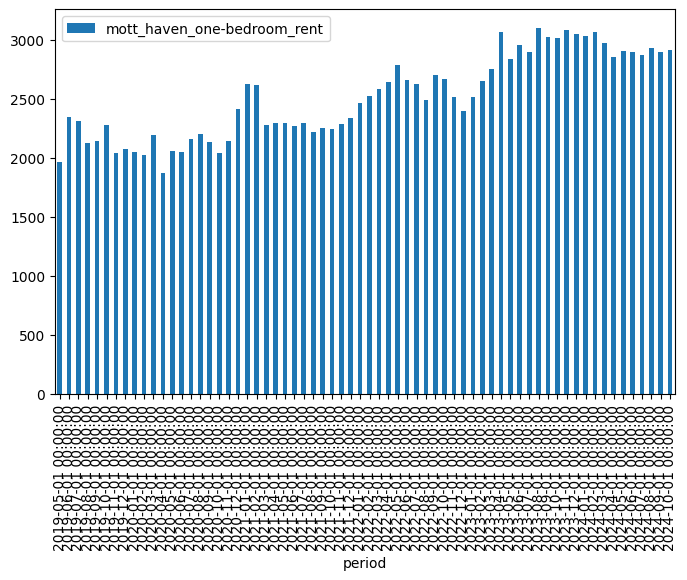

In [15]:
mh_one_bedroom_data.sort_values("period").plot(kind="bar", x="period", y="mott_haven_one-bedroom_rent", figsize=[8,5])

## Mott Haven (two-bedroom)

<Axes: xlabel='period'>

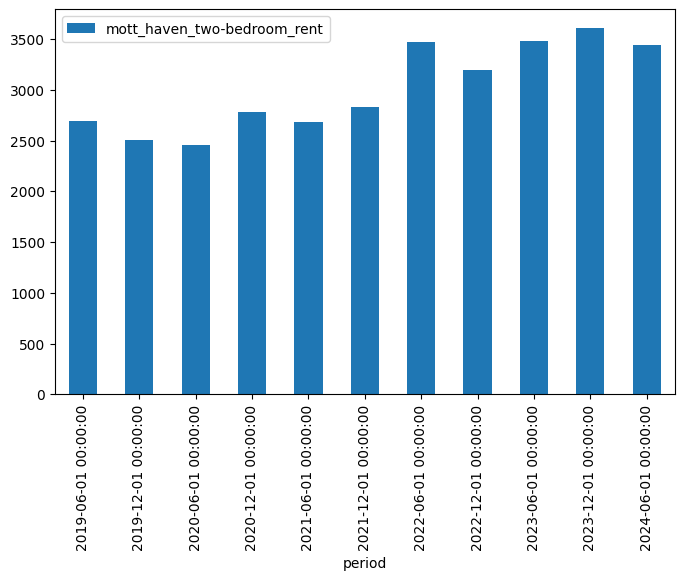

In [16]:
# mott haven two-bedroom rent
filtered = mh_two_bedroom_data[mh_two_bedroom_data["period"].dt.month.isin([6, 12])]
filtered.sort_values("period").plot(kind="bar", x="period", y="mott_haven_two-bedroom_rent", figsize=[8,5])

<Axes: xlabel='period'>

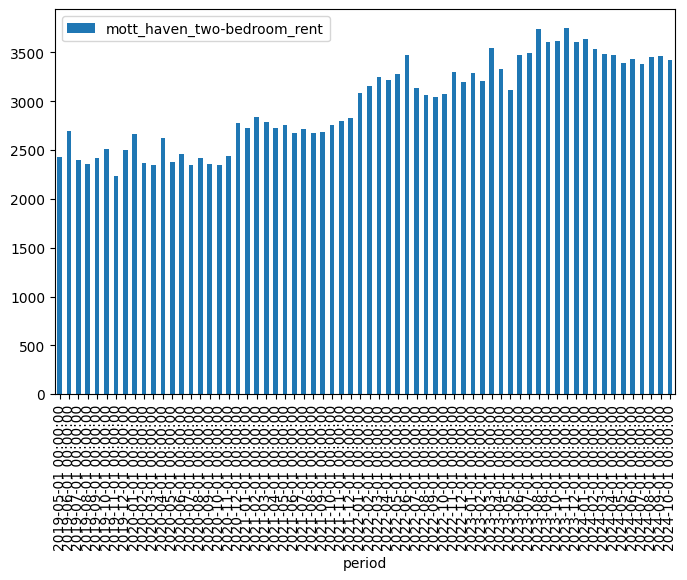

In [17]:
mh_two_bedroom_data.sort_values("period").plot(kind="bar", x="period", y="mott_haven_two-bedroom_rent", figsize=[8,5])

# Observation

* Bronx average: slow growth, spikes August 2023
* Mott Haven studio: spikes January 2020, December 2021, July 2022, February 2023
* Mott Haven one-bedroom: spikes December 2020, January 2021, May 2022, April 2023
* Mott Haven two-bedroom: spikes December 2020, January 2022, March 2023, August 2023